Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

1.Sepal Length<br> 
2.Sepal Width<br> 
3.Petal Length<br> 
4.Petal Width<br> 
Using above 4 features you will clasify a flower in one of the three categories,

1.Setosa<br> 
2.Versicolour<br> 
3.Virginica<br> 

#model predict with an acutal example from train data to verify it is correct. 

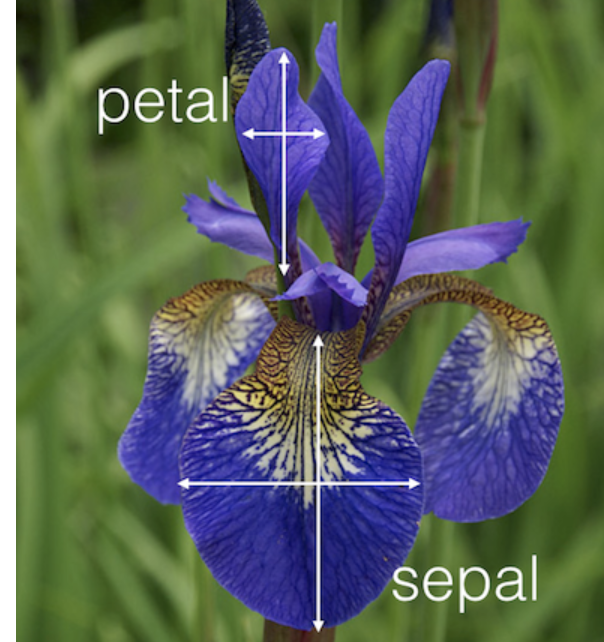

In [1]:
from IPython.display import Image
Image("./iris.png",width = 200, height = 350)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [3]:
iris = pd.read_csv("./Iris.csv") #load the dataset
iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.drop('Id',axis=1,inplace=True)

In [6]:
# fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
# iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
# iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
# fig.set_xlabel("Sepal Length")
# fig.set_ylabel("Sepal Width")
# fig.set_title("Sepal Length VS Width")
# fig=plt.gcf()
# fig.set_size_inches(10,6)
# plt.show()

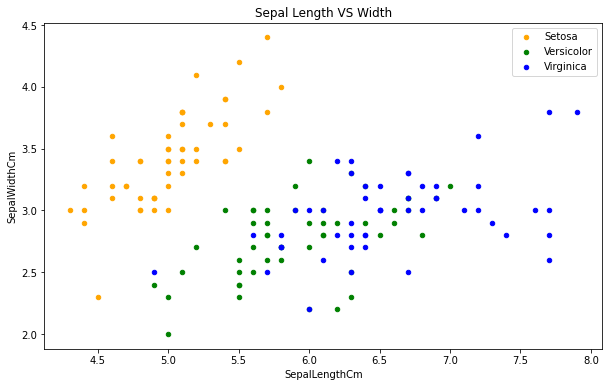

In [7]:
#ax.fig makes it appear in the same plot
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x="SepalLengthCm",y="SepalWidthCm",color='orange',label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x="SepalLengthCm",y="SepalWidthCm",color='green',label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x="SepalLengthCm",y='SepalWidthCm',color='blue',label='Virginica',ax=fig)
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)


The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

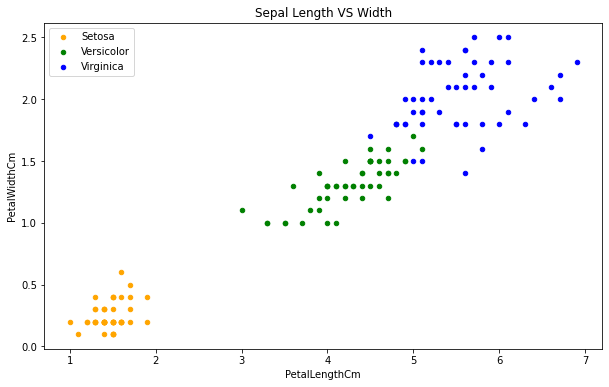

In [8]:
#ax.fig makes it appear in the same plot
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x="PetalLengthCm",y="PetalWidthCm",color='orange',label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x="PetalLengthCm",y="PetalWidthCm",color='green',label='Versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x="PetalLengthCm",y='PetalWidthCm',color='blue',label='Virginica',ax=fig)
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

Now let us see how are the length and width are distributed


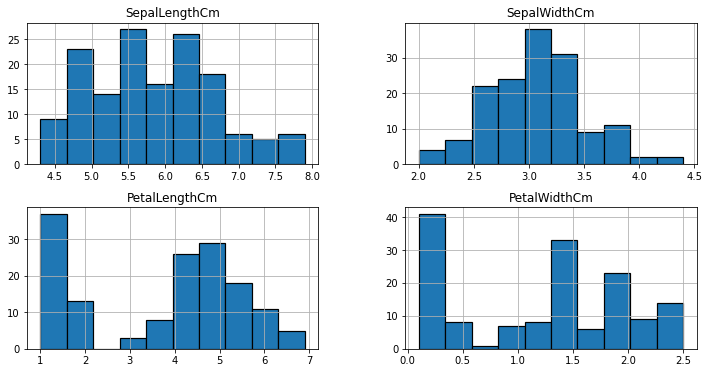

In [9]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)


Now let us see how the length and width vary according to the species

<AxesSubplot:>

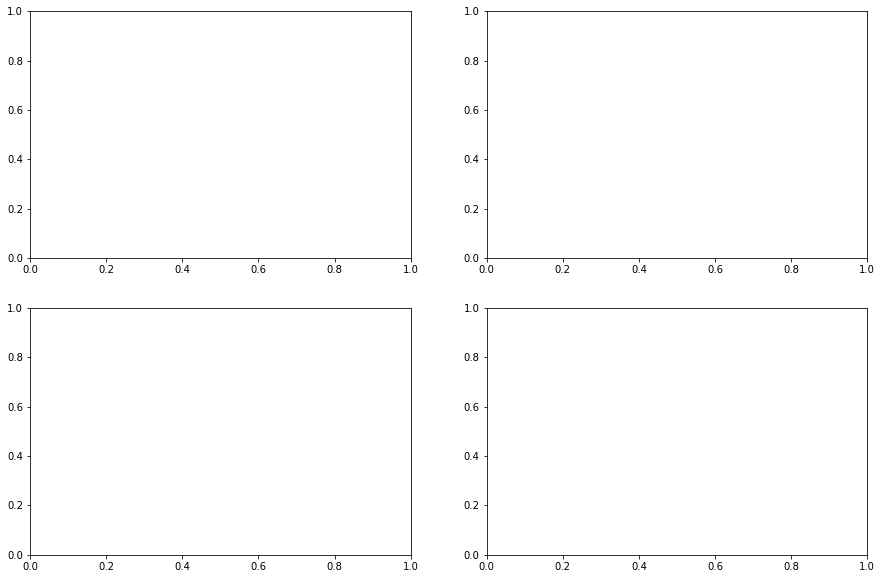

In [10]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.subplot(2,2,2)
plt.subplot(2,2,3)
plt.subplot(2,2,4)


In [11]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split
from sklearn import metrics #for checking the model accuracy


In [12]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


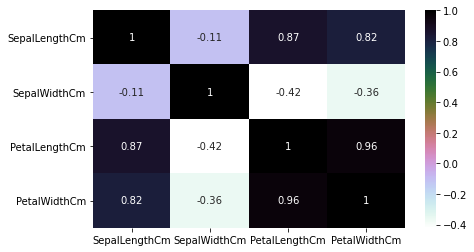

In [13]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

In [14]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [15]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]# taking the training data features
train_y=train.Species# output of our training data
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data features
test_y =test.Species

In [16]:
train_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
84,5.4,3.0,4.5,1.5
86,6.7,3.1,4.7,1.5


In [17]:
test_X.head(2)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
104,6.5,3.0,5.8,2.2
115,6.4,3.2,5.3,2.3


In [18]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 1.0


In [20]:
train_X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
84,5.4,3.0,4.5,1.5
86,6.7,3.1,4.7,1.5
42,4.4,3.2,1.3,0.2
149,5.9,3.0,5.1,1.8
91,6.1,3.0,4.6,1.4
...,...,...,...,...
95,5.7,3.0,4.2,1.2
140,6.7,3.1,5.6,2.4
15,5.7,4.4,1.5,0.4
121,5.6,2.8,4.9,2.0


In [21]:
train_y

84     Iris-versicolor
86     Iris-versicolor
42         Iris-setosa
149     Iris-virginica
91     Iris-versicolor
            ...       
95     Iris-versicolor
140     Iris-virginica
15         Iris-setosa
121     Iris-virginica
25         Iris-setosa
Name: Species, Length: 105, dtype: object

In [24]:
model.predict([[7.0,3.2,4.7,1.4]]) # proof of this working

array(['Iris-versicolor'], dtype=object)